In [1]:
import os
import numpy as np
import glob
import pandas as pd  
#from keras import utils as np_utils
import random
import math as mp

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras import layers, models

%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
scaler=StandardScaler()

In [ ]:
#Obtain all non-seizure signals from the drive (BONN dataset)
path='D:/'
#letter=['F','N','O','Z']  <- contain all non-seizure signals 
letter=['Z']
nfilenames=[]
end=''
for dr in letter:
    if dr=='N':
        end='/*.TXT'
    else:
        end='/*.txt' 
    nfilenames=nfilenames+glob.glob(path + dr + end) 

In [ ]:
len(nfilenames)  # check to see if all signals are read

In [ ]:
#Obtain all seizure signals from the drive (BONN dataset)
dr='S'
sfilenames=[]
end='/*.txt'
sfilenames=glob.glob(path + dr + end)

In [ ]:
len(sfilenames) # check to see if all signals are read

In [ ]:
#convert into array
def generate_datasets(filenames):
    arry=[]    
    for files in filenames:
        df=pd.read_table(files,names="X")
        arry.append(np.array(df))
    return np.array(arry)    

In [ ]:
sample_non_seizure = generate_datasets(nfilenames)

In [ ]:
sample_seizure = generate_datasets(sfilenames)

In [ ]:
# normalisation of non-seizure signals
X = sample_non_seizure
XC=X
X1=X.reshape(len(X)*4097,order='F')
X2=X1.reshape(4097,len(X))

X2=normalize(X2,axis=1)

X3=np.reshape(X2,4097*len(X),order='F')
X4=X3.reshape(len(X),4097,1)
X=X4
sample_non_seizure = X

In [ ]:
# normalisation of seizure signals
X = sample_seizure
XC=X
X1=X.reshape(len(X)*4097,order='F')
X2=X1.reshape(4097,len(X))

X2=normalize(X2,axis=1)

X3=np.reshape(X2,4097*len(X),order='F')
X4=X3.reshape(len(X),4097,1)
X=X4
sample_seizure = X

In [ ]:
# concate non-seizure and seizure signals
X = np.append(sample_non_seizure,sample_seizure, axis = 0)

In [ ]:
X.shape

In [ ]:
# generate labels, 0 for non-seizure, 1 for seizure
def generate_labels(cutoff,ln):
    arry=[]
    for i in range(0,ln):
        if i>=cutoff:
            arry.append(1)  # seizure
        else:
            arry.append(0)  # non-seizure
    return np.array(arry,dtype='int64')

In [ ]:
yy=generate_labels(100,200)

In [20]:
yy.shape

(200,)

In [21]:
# Apply Z-score normalisation
# axis=0 is column wise, axis=1 is row wise
'''
XC=X
X1=X.reshape(len(X)*4097,order='F')
X2=X1.reshape(4097,len(X))

X2=normalize(X2,axis=1)

X3=np.reshape(X2,4097*len(X),order='F')
X4=X3.reshape(len(y),4097,1)
X=X4

#def normalise_data(data_set):
#    arry=[]
#    for i in data_set:
#        arry.append(normalize(i,axis=0))
#    return np.array(arry)
'''

"\nXC=X\nX1=X.reshape(len(X)*4097,order='F')\nX2=X1.reshape(4097,len(X))\n\nX2=normalize(X2,axis=1)\n\nX3=np.reshape(X2,4097*len(X),order='F')\nX4=X3.reshape(len(y),4097,1)\nX=X4\n\n#def normalise_data(data_set):\n#    arry=[]\n#    for i in data_set:\n#        arry.append(normalize(i,axis=0))\n#    return np.array(arry)\n"

In [22]:
#X=normalise_data(X)
X.shape

(200, 4097, 1)

In [23]:
def plot_eeg_signal(sig,lab,cnt):
    flag=True
    
    i=0
    for X,y in zip(sig,lab):
        if i<cnt and y==0:
            plt.figure(i,figsize=(30,5))
            plt.plot(X,'b')
            plt.title('Non Seizure EEG Signal')
            i=i+1
        if i==cnt:
            break
   
    j=i
    i=0
    for X,y in zip(sig,lab):
        if i<cnt and y==1:
            plt.figure(i+j,figsize=(30,5))
            plt.plot(X,'r')
            plt.title('Seizure EEG Signal')
            i=i+1
        if i==cnt:
            break
    

In [24]:
#plot_eeg_signal(X,y,5)

In [25]:
#y = tf.keras.utils.to_categorical(y, num_classes=2)

In [26]:
#y.shape

In [27]:
# Initialising the CNN
cnn = tf.keras.Sequential()

# First Convolution Layer
cnn.add(layers.Conv1D(4, 6, input_shape = (4097, 1), activation='relu'))
#cnn.add(layers.LeakyReLU(alpha=0.05))  
#cnn.add(layers.BatchNormalization())
cnn.add(layers.MaxPooling1D(pool_size = 2, strides = 2))
#cnn.add(Dropout(0.25))

# Adding a second convolutional layer
cnn.add(layers.Conv1D(4, 5,activation='relu'))  #number of output filters, kernel size
#cnn.add(layers.LeakyReLU(alpha=0.05)) 
cnn.add(layers.MaxPooling1D(pool_size = 2, strides = 2))
#cnn.add(Dropout(0.25))

# Adding a third convolutional layer
cnn.add(layers.Conv1D(10, 4, activation='relu' ))
#cnn.add(layers.LeakyReLU(alpha=0.05)) 
cnn.add(layers.MaxPooling1D(pool_size = 2, strides = 2))
#cnn.add(Dropout(0.4))

# Adding a fourth convolutional layer
cnn.add(layers.Conv1D(10, 4, activation='relu' ))
#cnn.add(layers.LeakyReLU(alpha=0.05)) 
cnn.add(layers.MaxPooling1D(pool_size = 2, strides = 2))
#cnn.add(Dropout(0.4))

# Adding a fifth convolutional layer
cnn.add(layers.Conv1D(15, 4, activation='relu' ))
#cnn.add(layers.LeakyReLU(alpha=0.05)) 
cnn.add(layers.MaxPooling1D(pool_size = 2, strides = 2))
#cnn.add(Dropout(0.4))

# Step 3 - Flattening
cnn.add(layers.Flatten())

# Step 4 - Full connection
cnn.add(layers.Dense(units = 50, activation='relu'))
#cnn.add(layers.LeakyReLU(alpha=0.05)) 
#cnn.add(layers.Dropout(0.1))
cnn.add(layers.Dense(units = 20, activation='relu'))
#cnn.add(layers.LeakyReLU(alpha=0.05))
cnn.add(layers.Dense(units = 2, activation = 'softmax'))


# Compiling the CNN
cnn.compile(optimizer = tf.keras.optimizers.SGD(lr=0.01,momentum=0.3, decay=0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [28]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 4092, 4)           28        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2046, 4)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2042, 4)           84        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1021, 4)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1018, 10)          170       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 509, 10)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 506, 10)           4

In [29]:
Xx_train, Xx_test, yy_train, yy_test = train_test_split(X, yy, test_size=0.20, random_state=42)

In [30]:
Xx_train.shape

(160, 4097, 1)

In [31]:
yy_train.shape

(160,)

In [32]:
Xx_test.shape

(40, 4097, 1)

In [33]:
yy_test.shape

(40,)

In [34]:
model=cnn.fit(x=Xx_train, y=yy_train, batch_size=3, epochs=100, verbose=1,validation_data=(Xx_test,yy_test))

W0619 22:59:48.792821 139747892745984 deprecation.py:323] From /home/ad930/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 160 samples, validate on 40 samples
Epoch 1/100
160/160 [==============================] - 12s 78ms/sample - loss: 0.6954 - accuracy: 0.5437 - val_loss: 0.6963 - val_accuracy: 0.4250
Epoch 2/100
160/160 [==============================] - 1s 4ms/sample - loss: 0.6806 - accuracy: 0.6000 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 3/100
160/160 [==============================] - 1s 4ms/sample - loss: 0.6615 - accuracy: 0.7188 - val_loss: 0.6816 - val_accuracy: 0.5250
Epoch 4/100
160/160 [==============================] - 1s 4ms/sample - loss: 0.6389 - accuracy: 0.7375 - val_loss: 0.6604 - val_accuracy: 0.7000
Epoch 5/100
160/160 [==============================] - 1s 4ms/sample - loss: 0.6064 - accuracy: 0.7625 - val_loss: 0.6308 - val_accuracy: 0.6750
Epoch 6/100
160/160 [==============================] - 1s 4ms/sample - loss: 0.5561 - accuracy: 0.8562 - val_loss: 0.6006 - val_accuracy: 0.7500
Epoch 7/100
160/160 [==============================] - 1s 5ms/sample - loss: 0.4842

In [35]:
def plot_acc_valgraph(model,num):
    plt.figure(num)
    plt.plot(model.history['accuracy'])
    plt.plot(model.history['val_accuracy'])
    plt.legend(['Training','Validation'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')

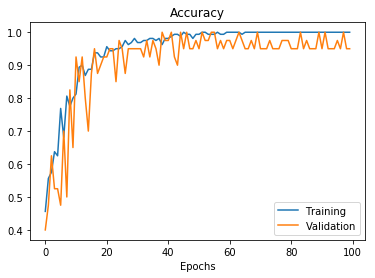

In [36]:
plot_acc_valgraph(model,1)

In [37]:
# evaluate the model
score = cnn.evaluate(Xx_test, yy_test, verbose=0)
print('Test loss:', score[0]*100)
print('Test accuracy:', score[1]*100)

Test loss: 6.597905009984969
Test accuracy: 94.9999988079071


In [38]:
yy_pred=cnn.predict(x=Xx_test, verbose=1)

40/40 [==============================] - 0s 3ms/sample


In [39]:
yy_test

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])

In [40]:
yy_pred

array([[9.9489754e-01, 5.1024510e-03],
       [9.8649293e-01, 1.3507112e-02],
       [9.7962660e-01, 2.0373436e-02],
       [4.3046885e-04, 9.9956948e-01],
       [1.6565058e-01, 8.3434945e-01],
       [3.9655683e-07, 9.9999964e-01],
       [9.9823219e-01, 1.7678584e-03],
       [3.7049747e-03, 9.9629503e-01],
       [4.6613571e-04, 9.9953389e-01],
       [9.9288356e-01, 7.1164272e-03],
       [9.6716034e-01, 3.2839667e-02],
       [3.0524358e-03, 9.9694759e-01],
       [3.3666395e-02, 9.6633363e-01],
       [9.9956995e-01, 4.3008864e-04],
       [6.1999357e-01, 3.8000643e-01],
       [3.0312528e-06, 9.9999702e-01],
       [9.9924111e-01, 7.5891195e-04],
       [5.7380319e-01, 4.2619684e-01],
       [9.9678999e-01, 3.2100317e-03],
       [9.9938273e-01, 6.1723305e-04],
       [4.9009257e-05, 9.9995100e-01],
       [9.8603106e-01, 1.3968878e-02],
       [7.3844544e-04, 9.9926156e-01],
       [9.9979693e-01, 2.0305895e-04],
       [9.8945206e-01, 1.0547945e-02],
       [9.4768775e-01, 5.

In [41]:
yy_pred1 = np.argmax(yy_pred, axis=1)

In [42]:
accuracy = accuracy_score(yy_test, yy_pred1)
print(accuracy*100)

95.0


In [43]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    # '.2f' if normalize else 
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

[[21  0]
 [ 2 17]]


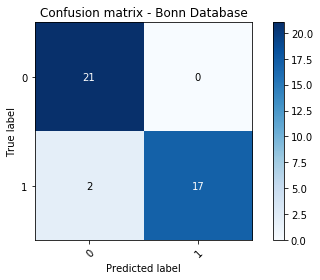

In [44]:
confusion_mat= plot_confusion_matrix(yy_test, yy_pred1, classes=[0,1], title='Confusion matrix - Bonn Database')

In [45]:
from sklearn.metrics import classification_report
print(classification_report(yy_test,yy_pred1,target_names = ['Non-Seizure(0)', 'Seizure(1)']))

                precision    recall  f1-score   support

Non-Seizure(0)       0.91      1.00      0.95        21
    Seizure(1)       1.00      0.89      0.94        19

      accuracy                           0.95        40
     macro avg       0.96      0.95      0.95        40
  weighted avg       0.95      0.95      0.95        40



In [35]:
#from tensorflow.keras.models import load_model

cnn.save('BONN_CNN_MODEL.h5')  # creates a HDF5 file 'my_model.h5'


# returns a compiled model
# identical to the previous one
#model = load_model('my_model.h5')

In [46]:
# load generator
from tensorflow.keras.models import load_model
gen = load_model('./GAN_Generator_model2.h5')

W0619 19:54:29.867009 140314562750208 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.


In [47]:
# generate 100 synthetic seizure signals
signal_gen = []
for i in range(0,100):
    noise = tf.random.normal([1, 100])
    generated_signal = gen(noise, training=False)
    generated_signal = generated_signal[:,:,0,:]
    signal_gen.append(generated_signal[0])


In [48]:
signal_gen = np.array(signal_gen)

In [123]:
# obtain 100 real non-seizure signals
#from sklearn.preprocessing import normalize
#path='D:/'
dr='Z'
sfilenames=[]

if dr=='N':
    end='/*.TXT'
else:
    end='/*.txt' 

#end='/*.txt'
sfilenames=glob.glob(path + dr + end)
import numpy as np
import pandas as pd

def generate_datasets(filenames):
    arry=[]    
    for files in filenames:
        df=pd.read_table(files,names="X")
        arry.append(np.array(df,dtype="float32"))
    return np.array(arry) 

In [124]:
len(sfilenames)

100

In [125]:
signals = generate_datasets(sfilenames)
### try normalising whole dataset

In [126]:
X = signals
XC=X
X1=X.reshape(len(X)*4097,order='F')
X2=X1.reshape(4097,len(X))

X2=scaler.fit_transform(X2)# normalize(X2,axis=1) 

X3=np.reshape(X2,4097*len(X),order='F')
X4=X3.reshape(len(X),4097,1)
X=X4
signals = X

In [111]:
'''
# Normalising synthetic signals
X = signal_gen
XC=X
X1=X.reshape(len(X)*4097,order='F')
X2=X1.reshape(4097,len(X))

X2=normalize(X2,axis=1)

X3=np.reshape(X2,4097*len(X),order='F')
X4=X3.reshape(len(X),4097,1)
X=X4
signal_gen = X
'''

"\n# Normalising synthetic signals\nX = signal_gen\nXC=X\nX1=X.reshape(len(X)*4097,order='F')\nX2=X1.reshape(4097,len(X))\n\nX2=normalize(X2,axis=1)\n\nX3=np.reshape(X2,4097*len(X),order='F')\nX4=X3.reshape(len(X),4097,1)\nX=X4\nsignal_gen = X\n"

In [112]:
x_test = np.append(signal_gen,signals, axis=0)  # 1,0
x_test.shape

(200, 4097, 1)

In [113]:
x_test.shape

(200, 4097, 1)

In [114]:
y_zero = np.zeros((100,),dtype='int64')
y_ones = np.ones((100,),dtype='int64')
y_test = np.append(y_ones, y_zero, axis=0)
y_test.shape


(200,)

In [115]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [116]:
# evaluate the model
score = cnn.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0]*100)
print('Test accuracy:', score[1]*100)

Test loss: 2.4479124695059227
Test accuracy: 100.0


In [117]:
y_pred2 = cnn.predict(x=x_test, verbose=1)

200/200 [==============================] - 0s 73us/sample


In [118]:
y_pred3 = np.argmax(y_pred2, axis=1)

In [119]:
y_pred3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [120]:
accuracy = accuracy_score(y_test, y_pred3)
print(accuracy*100)

100.0


[[100   0]
 [  0 100]]


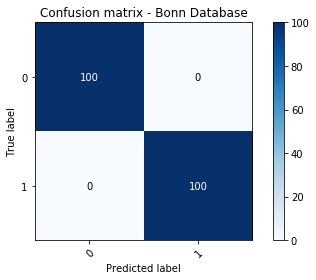

In [121]:
confusion_mat = plot_confusion_matrix(y_test, y_pred3, classes=[0,1], title='Confusion matrix - Bonn Database')

In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred3,target_names = ['Non-Seizure(0)', 'Seizure(1)']))

                precision    recall  f1-score   support

Non-Seizure(0)       1.00      1.00      1.00       100
    Seizure(1)       1.00      1.00      1.00       100

      accuracy                           1.00       200
     macro avg       1.00      1.00      1.00       200
  weighted avg       1.00      1.00      1.00       200

